In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os 
from scipy.special import expit

4


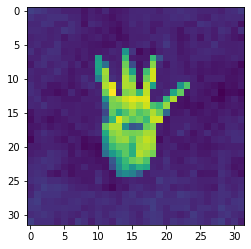

In [2]:
add="test"

list=os.listdir(add)
test_label=list[:]
test_data=[]

z=0
while z<len(test_label):
    test_label[z]=test_label[z][-6]

    add1 =add+"/"+list[z]

    image_pil = Image.open(add1)
    image = np.array(image_pil)

    a=np.arange(0,128,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)
    a=np.arange(0,64,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)

    image = (image / 255.0 * 0.99) + 0.01
    image=image.reshape(1,-1)
    test_data.append(image)
    
    z+=1

##############################################################################

add="train"

list=os.listdir(add)
train_label=list[:]
train_data=[]

z=0
while z<len(train_label):
    train_label[z]=train_label[z][-6]

    add1 =add+"/"+list[z]

    image_pil = Image.open(add1)
    image = np.array(image_pil)

    a=np.arange(0,128,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)
    a=np.arange(0,64,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)

    image=image.reshape(1,-1)
    image = (image / 255.0 * 0.99) + 0.01
    train_data.append(image)
    
    z+=1
##############################################################################

targets=[]
z=0
while z<len(train_label):
    target=np.zeros(6)+.01
    target[int(train_label[z])]=.99
    targets.append(target)
    z+=1


a=int(np.random.choice(len(list),1))
# plt.imshow(train_data[a])
plt.imshow(train_data[a].reshape(32,32))
# print(np.shape(train_data[a]))
print(train_label[a])

In [10]:
class neural_network:
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learninggrate):
        self.inodes=inputnodes
        self.hnodes1=hiddennodes1
        self.hnodes2=hiddennodes2
        self.onodes=outputnodes

        self.wih1=np.random.normal(.0, pow(self.hnodes1, -.5), (self.hnodes1, self.inodes))
        self.wh1h2=np.random.normal(.0, pow(self.hnodes2, -.5), (self.hnodes2, self.hnodes1))
        self.wh2o=np.random.normal(.0, pow(self.onodes, -.5), (self.onodes, self.hnodes2))

        self.lr=learninggrate

        self.activation_fun=lambda x : expit(x)

        pass

    def query(self, input_list): #질의
        inputs=np.array(input_list, ndmin=2).T

        hidden1_inputs=np.dot(self.wih1, inputs)
        hidden1_outputs=self.activation_fun(hidden1_inputs)
        
        hidden2_inputs=np.dot(self.wh1h2, hidden1_outputs)
        hidden2_outputs=self.activation_fun(hidden2_inputs)

        final_input=np.dot(self.wh2o ,hidden2_outputs)
        final_outputs=self.activation_fun(final_input)

        return final_outputs


    def train(self, input_list, target): # 학습
        inputs=np.array(input_list, ndmin=2).T
        target=np.array(target, ndmin=2).T

        hidden1_inputs=np.dot(self.wih1, inputs)
        hidden1_outputs=self.activation_fun(hidden1_inputs)
        
        hidden2_inputs=np.dot(self.wh1h2, hidden1_outputs)
        hidden2_outputs=self.activation_fun(hidden2_inputs)

        final_input=np.dot(self.wh2o ,hidden2_outputs)
        final_outputs=self.activation_fun(final_input)

        # 오차 정의
        output_err=target-final_outputs
        hidden2_err=np.dot(self.wh2o.T, output_err)
        hidden1_err=np.dot(self.wh1h2.T, hidden2_err)

        # oh2 역전파
        delta_w1=self.lr*np.dot(output_err*final_outputs*(1-final_outputs), hidden2_outputs.T)
        self.wh2o=self.wh2o+delta_w1
        
        # h2h1 역전파
        delta_w1=self.lr*np.dot(hidden2_err*hidden2_outputs*(1-hidden2_outputs), hidden1_outputs.T)
        self.wh1h2=self.wh1h2+delta_w1

        # h1i역전파
        delta_w2=self.lr*np.dot(hidden1_err*hidden1_outputs*(1-hidden1_outputs), inputs.T)
        self.wih1=self.wih1+delta_w2
        pass


In [17]:
input_nodes=1024
hiddennodes1=1500
hiddennodes2=1500
outputnodes=6

learning_rate=0.01

n=neural_network(input_nodes, hiddennodes1, hiddennodes2, outputnodes, learning_rate)
##############################################################################

z=0
while z<10:#len(train_data):
    # print(z)
    n.train(train_data[z], targets[z])
    # print(n.wh2o)
    z+=1
np.save("W/wih1", n.wih1)
np.save("W/wh1h2", n.wh1h2)
np.save("W/wh2o", n.wh2o)
##############################################################################

z=0
h=0
while z<len(test_data):
    # a=int(np.random.choice(len(test_data),1))
    a=z
    b=n.query(test_data[int(a)])
    # print(b)
    # print(np.shape(test_data[a]))
    if int(test_label[a]) == np.argmax(b):pass
    else:
        # print(np.argmax(b))
        # print(test_label[a])
        # plt.imshow(test_data[a].reshape(32,32))
        # print(z)
        h+=1
    z+=1
print(h)
print("정확도:", 1-h/len(test_label))

3000
정확도: 0.16666666666666663


In [18]:
os.system("say done")

0

In [23]:

print(np.shape(n.wih1))
print(np.shape(n.wh1h2))
print(np.shape(n.wh2o))

(1500, 1024)
(1500, 1500)
(6, 1500)


(32, 32, 3)
(1, 3072)


ValueError: shapes (1500,1024) and (3072,1) not aligned: 1024 (dim 1) != 3072 (dim 0)

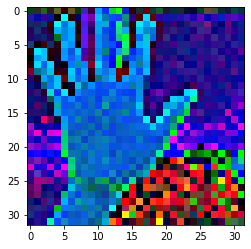

In [52]:
import cv2
import time
import os
from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)                       # 0번 카메라 연결

frameWidth = 32
frameHeight = 32
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(1,128)

time.sleep(3)

while True:

    os.system( "say  1" )
    os.system( "say  2" )
    os.system( "say  3" )
    os.system( "say  가위" )
    time.sleep(.05)
    os.system( "say  바위" )
    time.sleep(.05)
    os.system( "say  보" )
    
    ret, frame = cap.read()                 # 카메라 프레임 읽기
    cv2.imshow('camera',frame)          # 프레임 화면에 표시
    # if ret:
    if 1:            # 아무 키나 누르면
        # frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # frame = cv2.flip(frame,0)   # 상하 반전
        cv2.imwrite('photo.jpg', frame) # 프레임을 'photo.jpg'에 저장
        break
    # else:
    #     print('no frame!')
    #     break
cap.release()
cv2.destroyAllWindows()
plt.imshow(frame)

##############################################################################
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = np.array(frame)
# 크기 조절
image = np.delete(image,np.arange(263), axis = 0)
image = np.delete(image,-np.arange(265), axis = 0)
image = np.delete(image,np.arange(263), axis = 1)
image = np.delete(image,-np.arange(265), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

# 선명하게
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듭니다.

# 이미지를 선명하게 만듭니다.
# image=np.reshape(image,(32,32))
image = cv2.filter2D(image, -1, kernel)


print(np.shape(image))
plt.imshow(image)
##############################################################################
def query(input_list, wih1, wh1h2, wh2o): #질의
        inputs=np.array(input_list, ndmin=2).T

        hidden1_inputs=np.dot(wih1, inputs)
        hidden1_outputs=n.activation_fun(hidden1_inputs)
        
        hidden2_inputs=np.dot(wh1h2, hidden1_outputs)
        hidden2_outputs=n.activation_fun(hidden2_inputs)

        final_input=np.dot(wh2o ,hidden2_outputs)
        final_outputs=n.activation_fun(final_input)

        return final_outputs
wih1=np.load("/Users/yararal/python/신경망첫걸음/가위바위보/W/wh1h2.npy")
wh1h2=np.load("/Users/yararal/python/신경망첫걸음/가위바위보/W/wh1h2.npy")
wh2o=np.load("/Users/yararal/python/신경망첫걸음/가위바위보/W/wh2o.npy")


image = (image / np.max(image) * 0.99) + 0.01
# asd=query(image,wih1, wh1h2, wh2o)


image=image.reshape(1,-1)
print(np.shape(image))

asd=n.query(image)
re=np.argmax(asd)
print(10*asd)
print(re)

if re==2:
    os.system("say rock")
    print("rock")
if re==1:
    os.system("say rock")
    print("rock")
if re==0:
    os.system("say Paper")
    print("Paper")
if re==4 :
    os.system("say scissors")
    print("scissors")
if re==5 :
    os.system("say scissors")
    print("scissors")

# 추가 학습 시키기
# target=np.zeros(6)+.01
# target[0]=.99
# n.train(image, target)


In [54]:
print(np.shape(n.wih1))
print(np.shape(n.wh1h2))
print(np.shape(n.wh2o))



(1500, 1024)
(1500, 1500)
(6, 1500)
